### Import File

In [63]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(file_path)

# Printing how many rows the file has
row_count = len(df)

print(f'The DataFrame has {row_count} rows.')
# Preview the data
df


The DataFrame has 34857 rows.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


### Data Processing

Removing null values and dropping unecessarry columns

In [66]:
# Remove rows where critical columns have missing values
df = df.dropna(subset=['Price', 'Landsize', 'BuildingArea', 'Bedroom2', 'Bathroom', 'Car'])

# Drop unnecessary columns to simplify the dataset
df = df.drop(columns=['Rooms','Postcode', 'YearBuilt','Type','Propertycount', 'Longtitude', 'Lattitude',  'CouncilArea', 'Regionname', 'Suburb', 'Address', 'Method', 'SellerG', 'Date'])
row_count = len(df)


row_count2 = len(df)
print(f'The DataFrame has {row_count2} rows.')
df


The DataFrame has 9244 rows.


,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea
2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0
4,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0
6,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0
11,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0
14,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0
...,...,...,...,...,...,...,...
34847,500000.0,25.5,3.0,2.0,2.0,383.0,118.0
34849,570000.0,25.5,3.0,2.0,2.0,404.0,158.0
34853,888000.0,6.3,2.0,2.0,1.0,98.0,104.0
34854,705000.0,6.3,2.0,1.0,2.0,220.0,120.0


Removing decimal places and converting feilds to integers

Checking for duplicates and removing them (None in this dataset

In [69]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows is {duplicates.sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

# Confirm duplicates have been removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

row_count3 = len(df)
print(f'The DataFrame has {row_count3} rows.')




Number of duplicate rows is 16
Number of duplicate rows after removal: 0
The DataFrame has 9228 rows.


Data Normalisation

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Select required columns
features = df[['Price', 'Landsize', 'BuildingArea', 'Bedroom2', 'Bathroom', 'Car']]

df = df.iloc[:,0:13]

scaleMinMax = MinMaxScaler()

scalef = scaleMinMax.fit_transform(features)

scalefdf = pd.DataFrame(scalef, columns = features.columns)

scalefdf.round(3)




,Price,Landsize,BuildingArea,Bedroom2,Bathroom,Car
0,0.102,0.004,0.002,0.167,0.000,0.0
1,0.150,0.003,0.003,0.250,0.125,0.0
2,0.166,0.003,0.003,0.250,0.000,0.2
3,0.197,0.006,0.005,0.333,0.125,0.0
4,0.170,0.006,0.002,0.167,0.000,0.2
...,...,...,...,...,...,...
9223,0.042,0.009,0.003,0.250,0.125,0.2
9224,0.049,0.009,0.004,0.250,0.125,0.2
9225,0.085,0.002,0.002,0.167,0.125,0.1
9226,0.065,0.005,0.003,0.167,0.000,0.2


# **Data Analysis**

### Import File

In [97]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(file_path)

df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


### Box Plot

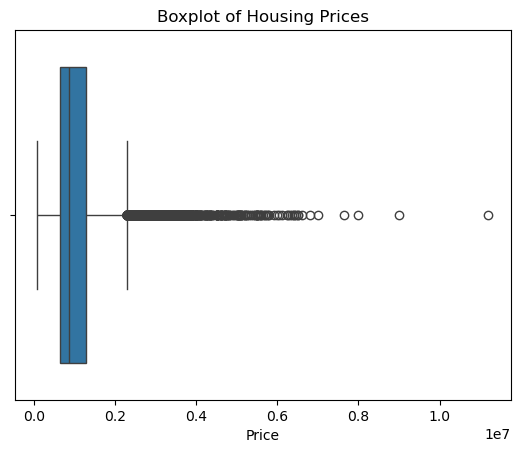

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Housing Prices')
plt.show()

### Histogram of Prices

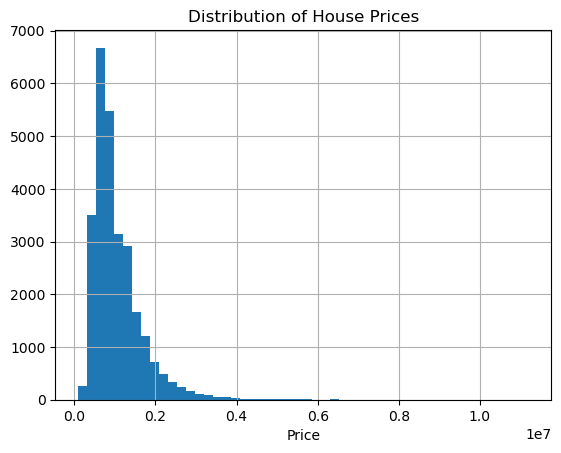

In [78]:
df['Price'].hist(bins=50)
plt.xlabel('Price')
plt.title('Distribution of House Prices')
plt.show()

### Corelation Heatmap

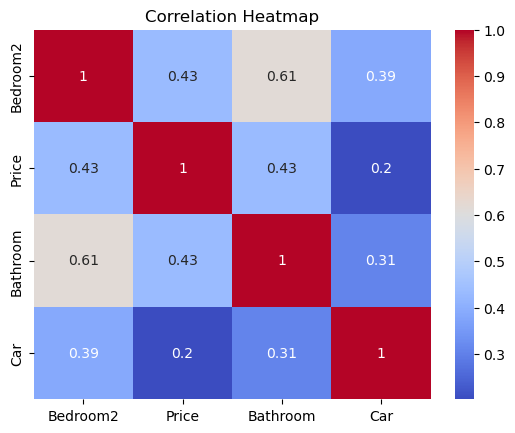

In [80]:
correlation_matrix = df[['Bedroom2', 'Price', 'Bathroom', 'Car']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Scatterplot of number of bedrooms v price

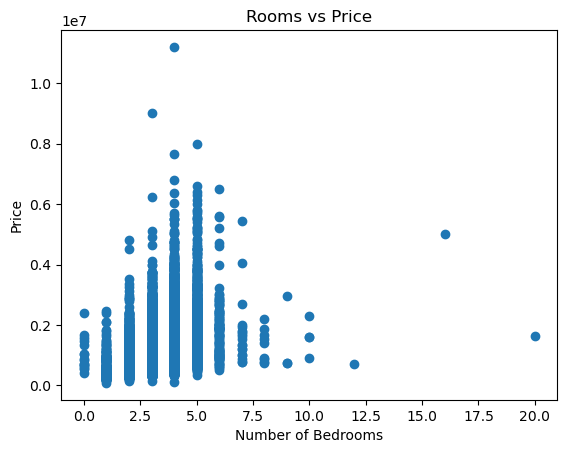

In [82]:
plt.scatter(df['Bedroom2'], df['Price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Rooms vs Price')
plt.show()

### Scatter plot with line of best fit between building area and price

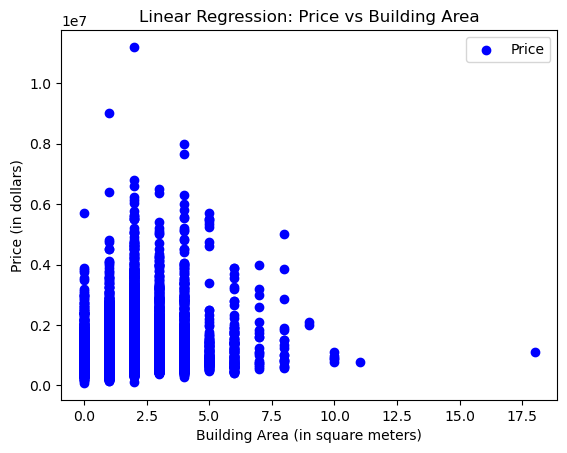

In [84]:
# Plot the scatter plot of actual data
plt.scatter(df['Car'], df['Price'], color='blue', label='Price')


# Adding labels and title
plt.xlabel('Building Area (in square meters)')
plt.ylabel('Price (in dollars)')
plt.title('Linear Regression: Price vs Building Area')

# Show legend
plt.legend()

# Show the plot
plt.show()